In [120]:
import os
import sys
import shutil
import time
import pytz
import traceback

import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt
import mpld3

import numpy as np
import pandas as pd

from Scripts.msidlists import *
from Scripts.event_times import *
from Scripts.plot_stylers import *

from tqdm import tqdm as progressbar

from hrcsentinel import hrccore as hrc


# allow_subset=True should let us draw more data points
# fetch.data_source.set('maude allow_subset=True')
# fetch.data_source.set('cxc', 'maude allow_subset=True')
fetch.data_source.set('maude')

hrc.styleplots()
labelsizes = 15
plt.rcParams['axes.titlesize'] = labelsizes + 2
plt.rcParams['axes.labelsize'] = labelsizes
plt.rcParams['xtick.labelsize'] = labelsizes
plt.rcParams['ytick.labelsize'] = labelsizes

%config InlineBackend.figure_format = 'retina'

Fetching full-resolution data for MSIDS=['2SHEV1RT', '2S2HVST', '2PMT2T', '2PRBSCR']
  from 2020:251:12:00:00.000 to 2020:254:12:38:16.377


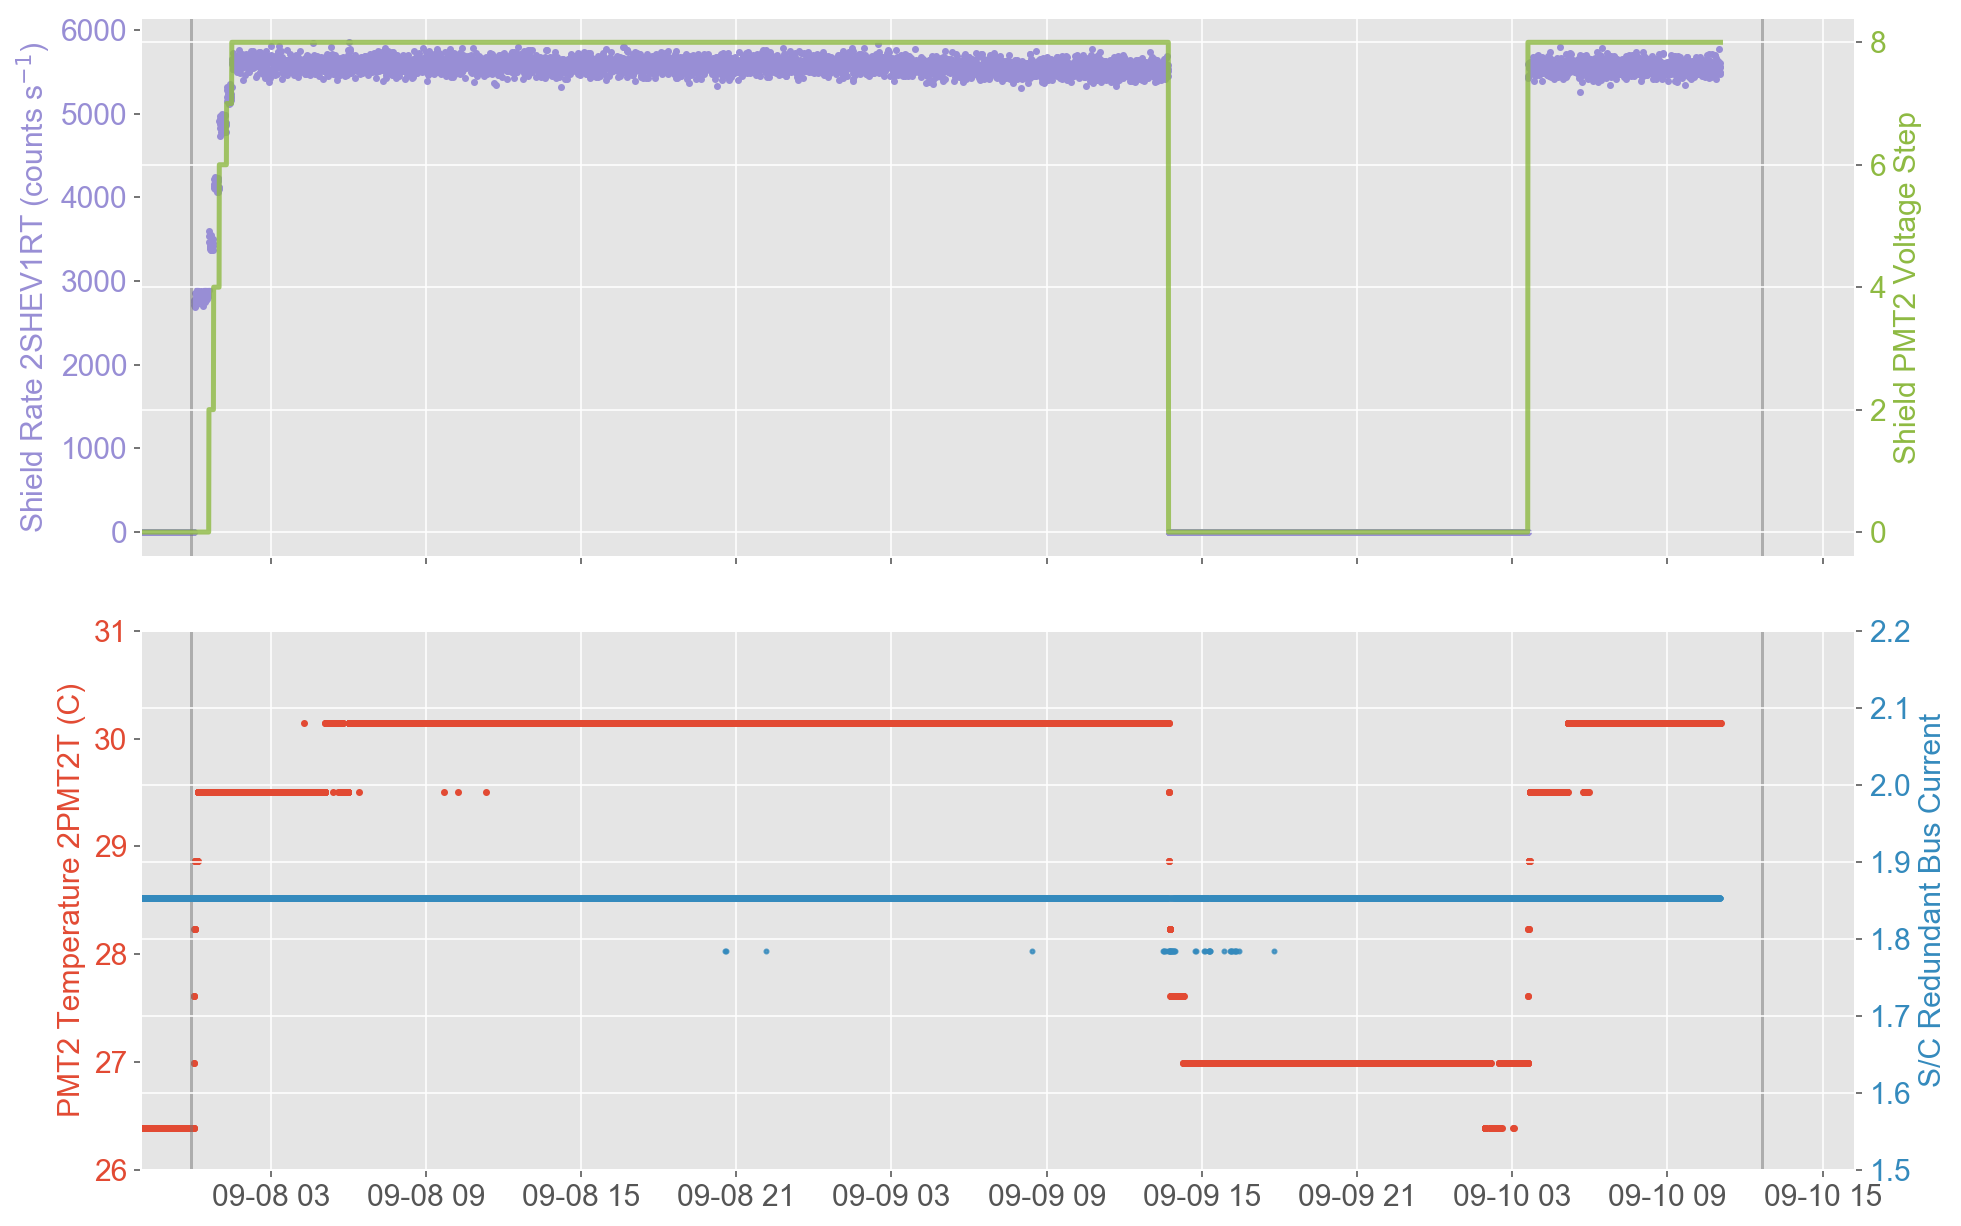

In [122]:
fig, axarray = plt.subplots(2, sharex=True, figsize=(14, 9), gridspec_kw={'height_ratios': [1, 1]})

dat = fetch.get_telem(['2SHEV1RT', '2S2HVST', '2PMT2T', '2PRBSCR'], start='2020:251')

times = hrc.convert_chandra_time(dat['2SHEV1RT'].times)
axarray[0].plot_date(times, dat['2SHEV1RT'].vals, markersize=2.5, color=purple)

axarray[0].grid('off', axis='y')

axarray[0].set_xlim(dt.datetime(2020, 9, 8, 0))

axarray[0].axvline(time_of_cap_1545a, color=gggray, alpha=0.5)
axarray[0].axvline(dt.datetime.now(pytz.utc), color=gggray, alpha=0.5)

topplot_rightax = axarray[0].twinx()
topplot_rightax.plot_date(times, dat['2S2HVST'].vals, color=green, alpha=0.8, linestyle='-', linewidth=2.5, markersize=0)

# axarray[0].set_yscale('log')

axarray[0].set_ylabel(r'Shield Rate 2SHEV1RT (counts s$^{-1}$)', color=purple)
axarray[0].tick_params(axis='y', labelcolor=purple)

topplot_rightax.set_ylabel('Shield PMT2 Voltage Step', color=green)
topplot_rightax.tick_params(axis='y', labelcolor=green)

topplot_rightax.set_xlim(dt.datetime(2020, 9, 7, 22))

axarray[1].plot_date(hrc.convert_chandra_time(dat['2PMT2T'].times), dat['2PMT2T'].vals, markersize=2.5, color=red)
axarray[1].set_ylabel('PMT2 Temperature 2PMT2T (C)', color=red)
axarray[1].tick_params(axis='y', labelcolor=red)

axarray[1].set_ylim(26,31)

bottomplot_rightax = axarray[1].twinx()
bottomplot_rightax.plot_date(hrc.convert_chandra_time(dat['2PRBSCR'].times), dat['2PRBSCR'].vals, color=blue, alpha=0.8, markersize=2)

bottomplot_rightax.set_ylabel('S/C Redundant Bus Current', color=blue)
bottomplot_rightax.tick_params(axis='y', labelcolor=blue)

bottomplot_rightax.set_xlim(dt.datetime(2020, 9, 7, 22))

bottomplot_rightax.set_ylim(1.5, 2.2)

axarray[1].grid('off', axis='y')
axarray[1].axvline(time_of_cap_1545a, color=gggray, alpha=0.5)
axarray[1].axvline(dt.datetime.now(pytz.utc), color=gggray, alpha=0.5)
plt.tight_layout()
plt.show()

fig.savefig('/Users/grant/Desktop/sabina.png', dpi=300)